In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
CLEAN_TWEETS = False

# Importing library and checking GPU

In [ ]:
import numpy as np
import pandas as pd
import os, re

import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
#!pip install transformers

Installing Hugging face lib, but look like they already interaged in

In [ ]:
df = pd.read_csv('labeled_data.csv')

print('Number of training sentences: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 10,671



,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
9568,9828,3,0,0,3,2,Graham crackers and hazelnut coffee are my fav...
4099,4221,3,0,3,0,1,@Midnight_Snacka u calling me a pussy but u no...
3584,3680,3,0,3,0,1,"@J_Kwest No, Cpt Commando is a hoe and a cocks..."
9023,9275,3,0,3,0,1,Ewww bitch #canunot #fuckoff
4030,4150,3,2,1,0,0,@MarianCristinax you a fag b
7818,8038,9,0,9,0,1,"As a girlfriend, you gotta accept the fact hoe..."
2934,3005,3,0,3,0,1,@DS_Arrogance @HG_Shit I bet I can pull at lea...
8924,9171,3,1,2,0,1,Eat a dick bitch
4477,4609,3,0,0,3,2,@RPopBox @boxing Yeah he definitely wasn't the...
7201,7406,3,3,0,0,0,@triple6em96 @Hunglikerobby_ bitch you watch y...


In the [class] collum: <br>
0 prefer to hate speech <br>
1 is offensive <br>
2 is neither

# Preprocessing

In [ ]:
#strip tweet related character
def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
#check functionality
print(df['tweet'][1])
strip_all_entities(df['tweet'][1])

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!


'RT boy dats cold tyga dwn bad for cuffin dat hoe in the 1st place'

In [ ]:
if CLEAN_TWEETS == False:
    df['tweet']=df['tweet'].apply(strip_all_entities)

In [ ]:
sentences = df['tweet'].values
labels = df['class'].values

# Train Test Val split

In [ ]:
from sklearn.model_selection import train_test_split

train, Teal = train_test_split(df, random_state=1508, shuffle=True, test_size=0.2)

In [ ]:
test, validation = train_test_split(Teal, random_state=1508, shuffle=True, test_size=0.5)

In [ ]:
# Get the lists of sentences and their labels.
trn_sentences = train['tweet'].values
train_labels = train['class'].values

tst_sentences = test['tweet'].values
test_labels = test['class'].values

val_sentences = validation['tweet'].values
validation_labels = validation['class'].values

## tokenization

In [ ]:
from transformers import BertTokenizer

print('loading Bert tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

loading Bert tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
enc_exp = tokenizer.encode('My name is Quan')
dec_exp = tokenizer.decode(enc_exp)
print(enc_exp)
print(dec_exp)

[101, 2026, 2171, 2003, 24110, 102]
[CLS] my name is quan [SEP]


## padding & masking

In [ ]:
print('Max array length: ', max([len(i) for i in sentences]))

Max array length:  495


In [ ]:
count1, count2, count3 = 0, 0, 0
for i in sentences:
    if len(i)>100:
        count1+=1
    if len(i)>200:
        count2+=1
    if len(i)>300:
        count3+=1
print('number of array longer than 100: ', count1)
print('number of array longer than 200: ', count2)
print('number of array longer than 300: ', count3)

number of array longer than 100:  2162
number of array longer than 200:  6
number of array longer than 300:  2


In [ ]:
# from statistics import mean

# token_len = []
# for i in sentences:
#     if len(i)>100 and len(i)<200:
#         enc = tokenizer.encode(i)
#         token_len.append(len(enc))
# print('average token length: ', mean(token_len))
# print('maximum token length: ', max(token_len))

--output-- <br>
average token length:  31.558446124099138 <br>
maximum token length:  83

In [ ]:
# count = 0
# for i in token_len:
#     if i > 64:
#         count+=1
# print('number of sentence longer than 64 words:', count)

--output-- <br>
number of sentence longer than 64 words: 14

In [ ]:
def bert_encode(data, max_len) :
    input_ids = []
    attention_masks = []


    for i in range(len(data)):
        encoded = tokenizer.encode_plus(data[i],
                                        add_special_tokens=True,
                                        max_length = max_len,
                                        padding = 'max_length',
                                        truncation = True,
                                        return_attention_mask=True)

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return np.array(input_ids),np.array(attention_masks)

In [ ]:
print(len(sentences),len(trn_sentences),len(tst_sentences),len(val_sentences))

10671 8536 1067 1068


In [ ]:
MAX_LEN = 64
train_inputs, train_masks = bert_encode(trn_sentences,MAX_LEN)

#test_inputs, test_masks = bert_encode(tst_sentences,MAX_LEN)

validation_inputs, validation_masks = bert_encode(val_sentences,MAX_LEN)

## convert data to pytorch datatype

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# BERT for sequence classification

In [ ]:
from transformers import BertForSequenceClassification, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## optimizer

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8) # args.adam_epsilon  - default is 1e-8.

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

## training loop

In [ ]:
def flat_accuracy(preds, labels):
    """
    Function to calculate the accuracy of our predictions vs labels
    """
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import numpy as np
# Initialize lists to store metrics per epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# For each epoch
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Track the training loss and accuracy
    total_train_loss = 0
    total_train_accuracy = 0

    # Put the model into training mode
    model.train()

    # Training loop
    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]

        total_train_loss += loss.item()

        # Calculate accuracy for this batch
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        batch_accuracy = flat_accuracy(logits, label_ids) #Calling the newly defined function
        total_train_accuracy += batch_accuracy

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)

    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Average training accuracy: {0:.2f}".format(avg_train_accuracy))

    # Validation
    print("Running Validation...")

    model.eval()
    total_val_loss = 0
    total_val_accuracy = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]

        total_val_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        batch_accuracy = flat_accuracy(logits, label_ids) #Calling the newly defined function
        total_val_accuracy += batch_accuracy

    avg_val_loss = total_val_loss / len(validation_dataloader)
    avg_val_accuracy = total_val_accuracy / len(validation_dataloader)

    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation Accuracy: {0:.2f}".format(avg_val_accuracy))

print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Average training loss: 0.42
  Average training accuracy: 0.84
Running Validation...
  Validation Loss: 0.29
  Validation Accuracy: 0.89

======== Epoch 2 / 4 ========
Training...
  Average training loss: 0.25
  Average training accuracy: 0.91
Running Validation...
  Validation Loss: 0.30
  Validation Accuracy: 0.90

======== Epoch 3 / 4 ========
Training...
  Average training loss: 0.20
  Average training accuracy: 0.93
Running Validation...
  Validation Loss: 0.32
  Validation Accuracy: 0.90

======== Epoch 4 / 4 ========
Training...
  Average training loss: 0.16
  Average training accuracy: 0.94
Running Validation...
  Validation Loss: 0.33
  Validation Accuracy: 0.90
Training complete!


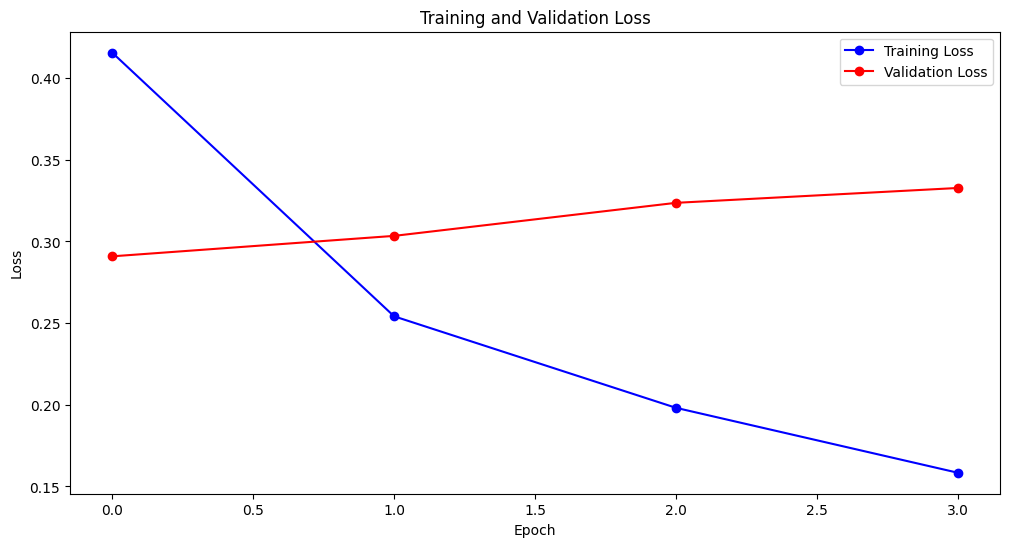

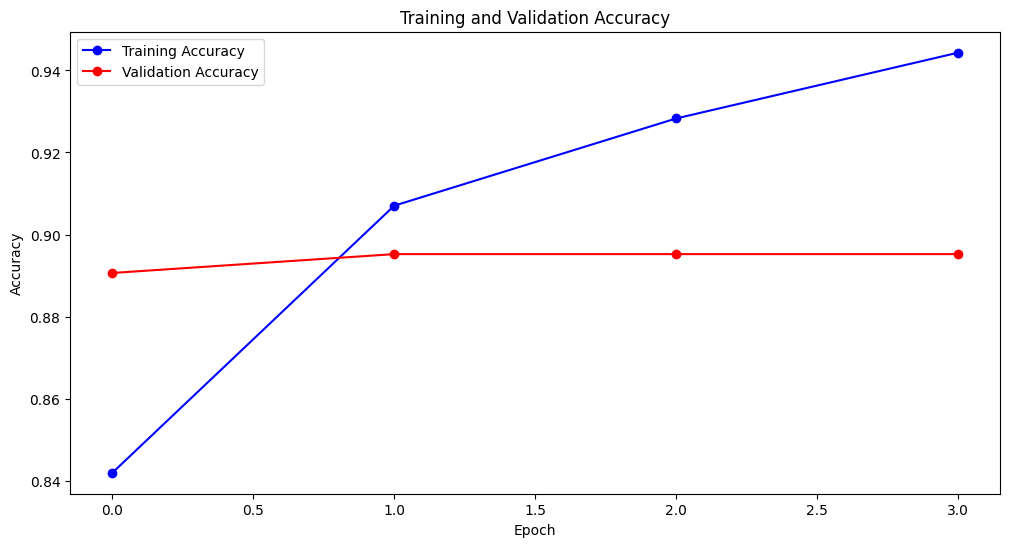

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, 'b-o', label="Training Loss")
plt.plot(val_losses, 'r-o', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, 'b-o', label="Training Accuracy")
plt.plot(val_accuracies, 'r-o', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# On test set

In [ ]:
test_inputs, test_masks = bert_encode(tst_sentences,MAX_LEN)

# Convert to tensors.
prediction_inputs = torch.tensor(test_inputs)
prediction_masks = torch.tensor(test_masks)
prediction_labels = torch.tensor(test_labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,067 test sentences...
    DONE.


## Matthew's correlation coefficient

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 3-column ndarray (one column for "0"
  # one for "1" and one for "2"). Pick the label with the highest value and turn this
  # in to a list of 0s, 1s, 2s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

In [ ]:
# Combine the predictions for each batch into a single list of 0s,1s, 2s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.691


## confusion matrix and Performace Report


===== Performance Report =====

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        98
           1       0.92      0.94      0.93       806
           2       0.83      0.87      0.85       163

    accuracy                           0.88      1067
   macro avg       0.77      0.74      0.75      1067
weighted avg       0.87      0.88      0.88      1067


===== Confusion Matrix =====



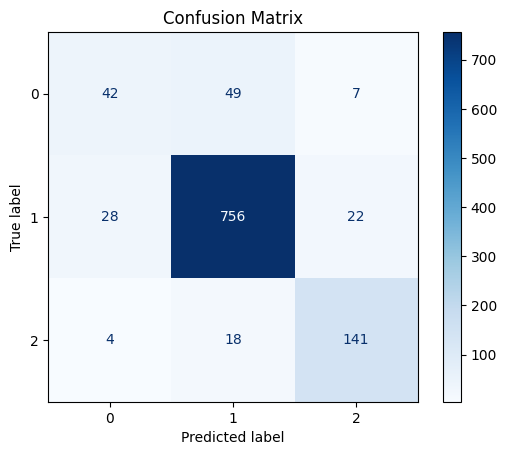

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Heading for the performance report
print("\n===== Performance Report =====\n")

# Classification report
print(classification_report(flat_true_labels, flat_predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(flat_true_labels, flat_predictions)

# Heading for the confusion matrix
print("\n===== Confusion Matrix =====\n")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
